# Assignment 2

Questions:
1.	[25 marks] House data: This Assignment requires you to write a Python script for linear regression. You are not allowed to use any Python public libraries related to regression and metrics. You can compare the results of your program with sklearn, numpy, or scipy linear models, but the whole exercise is to write the algorithm yourself. 
    
    1.1)	Load the House sales dataset from the houses.csv file and place them in a data-frame df. (Hint: You can use pandas.read_csv function. New in pandas? Click here ). Then generate and show various statistic summary using pandas.DataFrame.describe method. What is pandas dataframe? Using pandas.DataFrame methods split the dataset into target value Y (price) and feature matrix X (all feature columns). In addition, extract the sqft_living column into a feature vector name X_1.
   
   1.2)	Write a function named linear_regression to implement Linear Regression without using public libraries related to regression. The inputs of this function should be predictor values (X or X_1), a target value (Y), a learning rate (lr), and the number of iterations (repetition). The function must build a linear model using gradient descent and output the model (params) and loss values per iteration (loss). Set the iteration to 10000 and calculate and show the mean squared error (MSE) for the models obtained from both X and X_1 predictors (hint: you might write another function named predict to predict the values based on X or X_1 and params) and plot the learning curve (loss) for both models in one figure (hint: use log scaling plot). Try different learning rates and show the results.
   
   1.3)	Visualize the best-obtained model for X_1 using a scatter plot to show price vs area and plot the linear model. Then, visualize the best-obtained model for all features (X) using a scatter plot to show the predicted vs actual target values. 
    
    1.4)	Modify the linear_regression function in a way that applies Ridge regression, and name them linear_regression_Ridge. Then repeat the assignments 1.2 and 1.3. You can thereby use a fixed learning rate that you find appropriate, but you should try and plot different values for the regularization penalty alpha.
    
    1.5)	Use linear_regression_Ridge and write a function named linear_regression_Ridge_momentum in which you add a momentum term. Try different momenta and plot the learning curves with and without momentum for a fixed learning rate.
    
    1.6)	Modify the linear_regression_Ridge_momentum function in a way that it fits the feature vector X_1 with a polynomial of order 2 and name it as polynomial_regression_optimized. Calculate the MSE, plot the learning curve and show the quadratic model on the scatter plot (price vs area).



2)	[15 marks] Working with random numbers:
   
   2.1)	Write a program that rolls two dice (randomly selects a number between 1 and 6 inclusive for each die). Repeat rolling dice 20 times. For each trial, you should add the two numbers that appear on each die and save it in a vector. Plot a histogram of the values you have gathered in the vector. Based on this histogram, what are the estimates for the probabilities of each number? 
   
   2.2)	Run your code for 1000 times. What is your estimation now? 
    
   2.3)	Change your program and assume that you have one fake die and one correct die. The fake die has 0 instead of 2. This means when you roll this defect die, a random number should be chosen among (1,0,3,4,5, and 6). Plot histogram of the values you have gathered in the vector. Calculate the probability of getting a 7 as the sum of the numbers appeared on the dice. What is the probability of getting 3?
   
   2.4)	[Grad student only] Try the same problem with seven dice and plot the distribution together with a Gaussian fit. Report the mean and variance as calculated directly from the data as well as the fitted parameters. 


## 1.1

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

house_data = pd.read_csv('HOUSES_data/houses.csv')
#house_data.describe()



In [121]:
house_data.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [122]:
house_data.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [123]:
house_data.floors.describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [124]:
Y=house_data.iloc[:,0]
X=house_data.iloc[:,1:]
X_1=house_data.iloc[:,3]
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
5             4       4.50         5420    101930     1.0           0     0   
6             3       2.25         1715      6819     2.0           0     0   
7             3       1.50         1060      9711     1.0           0     0   
8             3       1.00         1780      7470     1.0           0     0   
9             3       2.50         1890      6560     2.0           0     0   
10            3       2.50         3560      9796     1.0           0     0   
11            2       1.00         1160      6000   

## 1.2

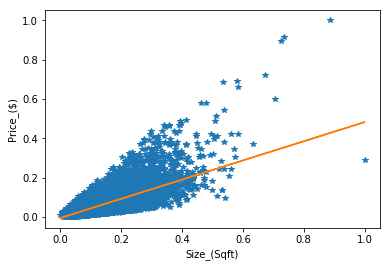

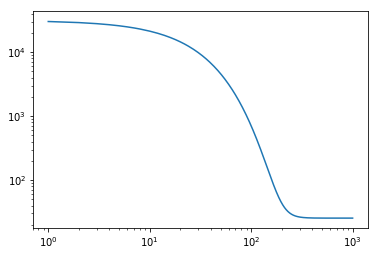

In [125]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
hsize=X_1
price=Y
#normalise the data
hsize=(hsize-min(hsize))/(max(hsize)-min(hsize))
price=(price-min(price))/(max(price)-min(price))
L=array([])
alpha=0.00009
def linearRegression(hsize,price,L,alpha):
    w1=array([-1])
    w2=array([-1])
    for iter in range(1000):
        y=w1[-1]*hsize+w2[-1]
        w1=append(w1,w1[-1]-alpha*sum((y-price)*hsize))
        w2=append(w2,w2[-1]-alpha*sum(y-price))
        L=append(L,sum((y-price)**2))
        #print('Loss value each iteration: ',L)
    plot(hsize,price,'*')
    plot(hsize,y)
    xlabel('Size_(Sqft)')
    ylabel('Price_($)')
    show()
    loglog(L)
    show()

linearRegression(hsize,price,L,alpha)          

## 1.3

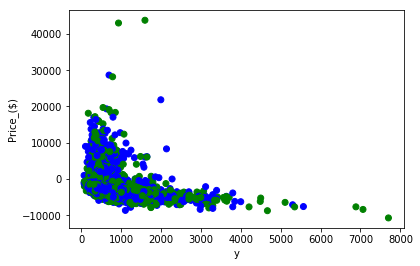

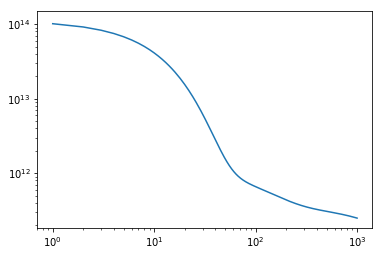

In [126]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
house_data = pd.read_csv('HOUSES_data/houses.csv')
# house_data.describe()

Y=house_data.iloc[:,0]
X=house_data.iloc[:,1:]
df = X.as_matrix()
X_1=house_data.iloc[:,3]
L=array([])
alpha=0.0000000000000009
#price=Y
#normalise
# price=(price-min(price))/(max(price)-min(price))
# for i in range(len(X.columns)):
#     X.iloc[i]=(X.iloc[i]-min(X.iloc[i]))/(max(X.iloc[i])-min(X.iloc[i]))
def linearRegression(X,Y,L,alpha):
    temp1 = array([-1, -1, 0.05, -1, -1, -1, 0.75, -1,0.05, -1, -1, -1, -1, -1, -1])
    temp2 = array([-1])
    for itr in range(1000):
        y = np.dot(np.array(X), np.array(temp1)) + temp2
        temp1 = temp1 - alpha * np.dot((y - Y), X)
        temp2 = temp2 - alpha * (y - Y)
        L = np.append(L, sum((y - Y) ** 2))
    plt.scatter(Y,y,c=["g","b"])
    #plot(Y,y)
    xlabel('y')
    ylabel('Price_($)')
    show()
    loglog(L)
    show()
linearRegression(X,Y,L,alpha)

## 1.4

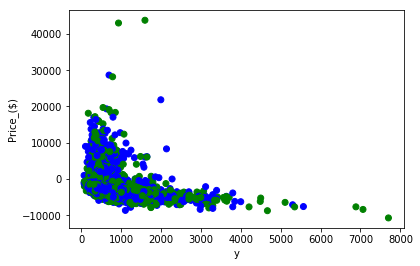

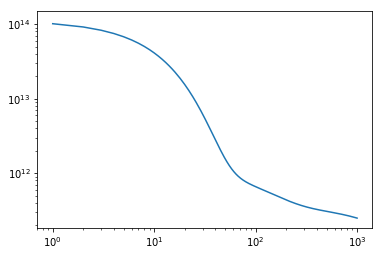

In [127]:
alpha=0.0000000000000009
gamma=0.01
def linearRegressionRidge(X,Y,L,alpha):
    temp1 = array([-1, -1, 0.05, -1, -1, -1, 0.75, -1,0.05, -1, -1, -1, -1, -1, -1])
    temp2 = array([-1])
    for itr in range(1000):
        y = np.dot(np.array(X), np.array(temp1)) + temp2
        temp1 = (1-2*alpha*gamma)*temp1 - alpha * np.dot((y - Y), X)
        temp2 = temp2 - alpha * (y - Y)
        L = np.append(L, sum((y - Y) ** 2))
    plt.scatter(Y,y,c=["g","b"])
    #plot(Y,y)
    xlabel('y')
    ylabel('Price_($)')
    show()
    loglog(L)
    show()
linearRegressionRidge(X,Y,L,alpha)

## 1.5

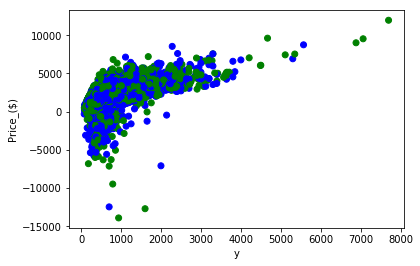

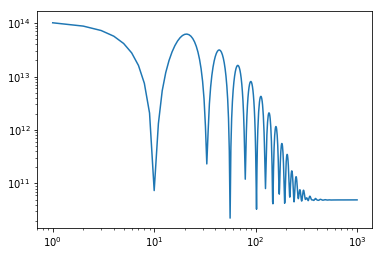

In [128]:
alpha=0.0000000000000009
m=0.5
def linearRegressionRidge(X,Y,L,alpha):
    temp1 = array([-1, -1, 0.05, -1, -1, -1, 0.75, -1,0.05, -1, -1, -1, -1, -1, -1])
    temp2 = array([-1])
    for itr in range(1000):
        y = np.dot(np.array(X), np.array(temp1)) + temp2
        delta1=np.dot(temp1[-1]-temp1[-2],m)
        temp1 = (1-2*alpha*gamma)*temp1 - alpha * np.dot((y - Y), X)+delta1
        temp2 = temp2 - alpha * (y - Y)
        L = np.append(L, sum((y - Y) ** 2))
    plt.scatter(Y,y,c=["g","b"])
    #plot(Y,y)
    xlabel('y')
    ylabel('Price_($)')
    show()
    loglog(L)
    show()
linearRegressionRidge(X,Y,L,alpha)

## 1.6

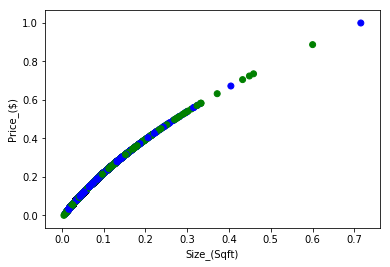

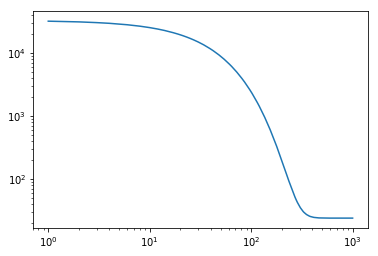

In [129]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
hsize=X_1
price=Y
#normalise the data
hsize=(hsize-min(hsize))/(max(hsize)-min(hsize))
price=(price-min(price))/(max(price)-min(price))
L=array([])
alpha=0.00009
def linearRegression(hsize,price,L,alpha):
    w1=array([-1])
    w2=array([-1])
    w3=array([-1])
    for iter in range(1000):
        y=w1[-1]*(hsize**2)+w2[-1]*hsize+w3[-1]
        w1=w1-alpha*sum((y-price)*hsize)
        w2=w2-alpha*sum((y-price)*hsize)
        w3=w3-alpha*sum(y-price)
        L=append(L,sum((y-price)**2))
        #print('Loss value each iteration: ',L)
    plt.scatter(y,hsize,c=["g","b"])
    #plot(hsize,y)
    xlabel('Size_(Sqft)')
    ylabel('Price_($)')
    show()
    loglog(L)
    show()

linearRegression(hsize,price,L,alpha)          

## 2.1

[9, 11, 7, 9, 4, 3, 5, 8, 8, 11, 5, 6, 8, 7, 7, 12, 9, 3, 6, 9]


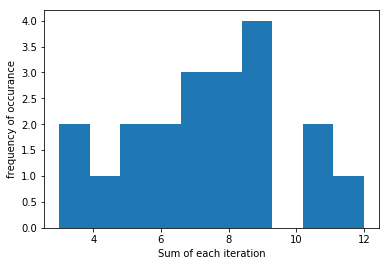

Counter({9: 4, 7: 3, 8: 3, 11: 2, 3: 2, 5: 2, 6: 2, 4: 1, 12: 1})
dict_keys([9, 11, 7, 4, 3, 5, 8, 6, 12]) 2
probability of  9  is:  0.2
probability of  11  is:  0.1
probability of  7  is:  0.15
probability of  4  is:  0.05
probability of  3  is:  0.1
probability of  5  is:  0.1
probability of  8  is:  0.15
probability of  6  is:  0.1
probability of  12  is:  0.05


In [138]:
import random
import matplotlib.pyplot as plt
import collections
sum=[]
loops=20
for i in range(loops):
    a=random.randint(1,6)
    b=random.randint(1,6)
    sum.append(a+b)
print (sum)
plt.hist(sum)
plt.ylabel("frequency of occurance")
plt.xlabel("Sum of each iteration")
plt.show()
counter=collections.Counter(sum)
print (counter)
print(counter.keys(),counter[11])
for i in counter.keys():
    print('probability of ',i,' is: ',counter[i]/loops )

## 2.2

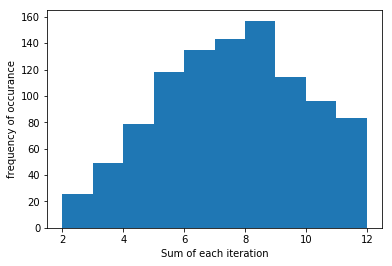

Counter({8: 157, 7: 143, 6: 135, 5: 118, 9: 114, 10: 96, 4: 79, 11: 52, 3: 49, 12: 31, 2: 26})
dict_keys([11, 4, 7, 6, 2, 10, 9, 8, 3, 12, 5]) 52
probability of  11  is:  0.052
probability of  4  is:  0.079
probability of  7  is:  0.143
probability of  6  is:  0.135
probability of  2  is:  0.026
probability of  10  is:  0.096
probability of  9  is:  0.114
probability of  8  is:  0.157
probability of  3  is:  0.049
probability of  12  is:  0.031
probability of  5  is:  0.118


In [139]:
import random
import matplotlib.pyplot as plt
import collections
sum=[]
loops=1000
for i in range(loops):
    a=random.randint(1,6)
    b=random.randint(1,6)
    sum.append(a+b)
#print (sum)
plt.hist(sum)
plt.ylabel("frequency of occurance")
plt.xlabel("Sum of each iteration")
plt.show()

counter=collections.Counter(sum)
print (counter)
print(counter.keys(),counter[11])
for i in counter.keys():
    print('probability of ',i,' is: ',counter[i]/loops )
    

## 2.3

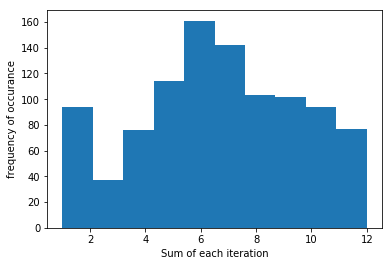

Counter({6: 161, 7: 142, 5: 114, 8: 103, 9: 102, 10: 94, 4: 76, 2: 67, 11: 58, 3: 37, 1: 27, 12: 19})
dict_keys([5, 9, 10, 11, 6, 8, 7, 2, 4, 12, 1, 3]) 58
probability of  5  is:  0.114
probability of  9  is:  0.102
probability of  10  is:  0.094
probability of  11  is:  0.058
probability of  6  is:  0.161
probability of  8  is:  0.103
probability of  7  is:  0.142
probability of  2  is:  0.067
probability of  4  is:  0.076
probability of  12  is:  0.019
probability of  1  is:  0.027
probability of  3  is:  0.037


In [140]:
import random
import matplotlib.pyplot as plt
import collections
sum=[]
loops=1000
wrong_number=2
for i in range(loops):
    a=random.randint(1, 6)
    #print('before',a)
    if a == wrong_number:
        a=0
    #print('after', a)
    b=random.randint(1,6)
    sum.append(a+b)
#print (sum)
plt.hist(sum)
plt.ylabel("frequency of occurance")
plt.xlabel("Sum of each iteration")
plt.show()

counter=collections.Counter(sum)
print (counter)
print(counter.keys(),counter[11])
for i in counter.keys():
    #print(i," : ",counter[i])
    print('probability of ',i,' is: ',counter[i]/loops )
    

## 2.4

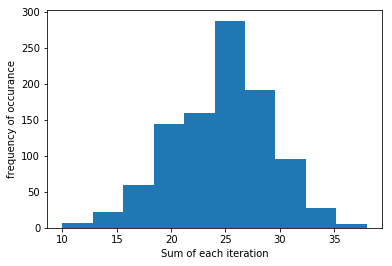

Counter({24: 110, 26: 95, 22: 85, 25: 83, 23: 75, 28: 73, 21: 63, 29: 59, 27: 59, 20: 46, 30: 43, 19: 36, 18: 31, 31: 26, 32: 26, 16: 16, 33: 15, 17: 13, 15: 11, 34: 11, 14: 7, 13: 4, 11: 3, 35: 2, 36: 2, 38: 2, 12: 2, 37: 1, 10: 1})
dict_keys([20, 22, 29, 25, 28, 24, 27, 21, 23, 19, 31, 30, 26, 18, 32, 17, 15, 11, 34, 33, 35, 16, 37, 14, 13, 10, 36, 38, 12]) 3
probability of  20  is:  0.046
probability of  22  is:  0.085
probability of  29  is:  0.059
probability of  25  is:  0.083
probability of  28  is:  0.073
probability of  24  is:  0.11
probability of  27  is:  0.059
probability of  21  is:  0.063
probability of  23  is:  0.075
probability of  19  is:  0.036
probability of  31  is:  0.026
probability of  30  is:  0.043
probability of  26  is:  0.095
probability of  18  is:  0.031
probability of  32  is:  0.026
probability of  17  is:  0.013
probability of  15  is:  0.011
probability of  11  is:  0.003
probability of  34  is:  0.011
probability of  33  is:  0.015
probability of  3

In [141]:
import random
import matplotlib.pyplot as plt
import collections
sum=[]
loops=1000
wrong_number=2
for i in range(loops):
    a1=random.randint(1,6)
    a2=random.randint(1,6)
    a3=random.randint(1,6)
    a4=random.randint(1,6)
    a5=random.randint(1,6)
    a6=random.randint(1,6)
    a7=random.randint(1,6)
    sum.append(a1+a2+a3+a4+a5+a6+a7)
#print (sum)
plt.hist(sum)
plt.ylabel("frequency of occurance")
plt.xlabel("Sum of each iteration")
plt.show()

counter=collections.Counter(sum)
print (counter)
print(counter.keys(),counter[11])
for i in counter.keys():
    #print(i," : ",counter[i])
    print('probability of ',i,' is: ',counter[i]/loops )
    counter[i]/loops
    

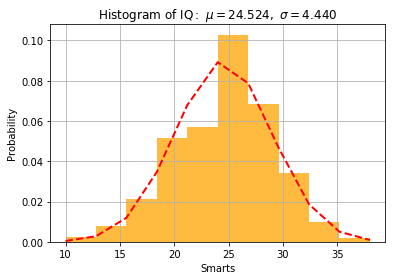

In [145]:
from scipy.stats import norm

# best fit of data
(mu, sigma) = norm.fit(sum)

# the histogram of the data
n, bins, patches = plt.hist(sum, normed=True, facecolor='orange', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()